# Overview & Business Understanding 

Data Understanding: 

ChestX-ray dataset comprises 112,120 frontal-view X-ray images of 30,805 unique patients with the text-mined fourteen disease image labels (each image can have multi-labels). An X-ray is produced when a negatively charged electrode is heated by electricity and electrons are released, thereby producing energy. That energy is directed toward a metal plate, or anode, at high velocity and the X-ray is produced when the energy collides with the atoms in the metal plate.

Fourteen common thoracic pathologies include Atelectasis, Consolidation, Infiltration, Pneumothorax, Edema, Emphysema, Fibrosis, Effusion, Pneumonia, Pleural thickening, Cardiomegaly, Nodule, Mass and Hernia. 112,120 frontal-view chest X-ray PNG images in 1024*1024 resolution (RGB). Orientation is almost stable since they are all frontal-view images. Dynamic range is high because of the nature of X-ray images. Also, resizing was needed since 1024*1024 images are computationally expensive. We converted the image to first grayscale to decrease the number of channels and resized the image (256*256). 

We used only one X-ray image from every unique patient. Besides, we included 1050 patient data by including 5 number of thoracic pathologies (Infiltration, Emphysema, Cardiomegaly, Atelectasis, No Finding) since we had limited time for this project and we wanted to decrease the total data size. We selected the given pathologies since they have more distinctive differences than other diseases. This dataset is open-source and can be found in the following links. We tried to guess the pathological condition. 
https://nihcc.app.box.com/v/ChestXray-NIHCC/

This analysis can be used by the administration of the hospitals. We experienced a pandemic in which hospitals reach their capacity. Thus, this analysis is important for hospital’s source utilization. This analysis is also critical to have a faster diagnosis. It is crucial for hospitals and doctors to predict which patients will receive what type of treatment in a short time.  Diagnosis requires a high percentage of success rate. If we cannot achieve this, it can be used for educational purposes.

Our dataset is extracted from the clinical PACS database at National Institutes of Health Clinical Center and consists of approximately 60% of all frontal chest x-rays in the hospital. Therefore, we expect this dataset is significantly more representative to the real patient population distributions and realistic clinical diagnosis challenges, than previous chest x-ray datasets.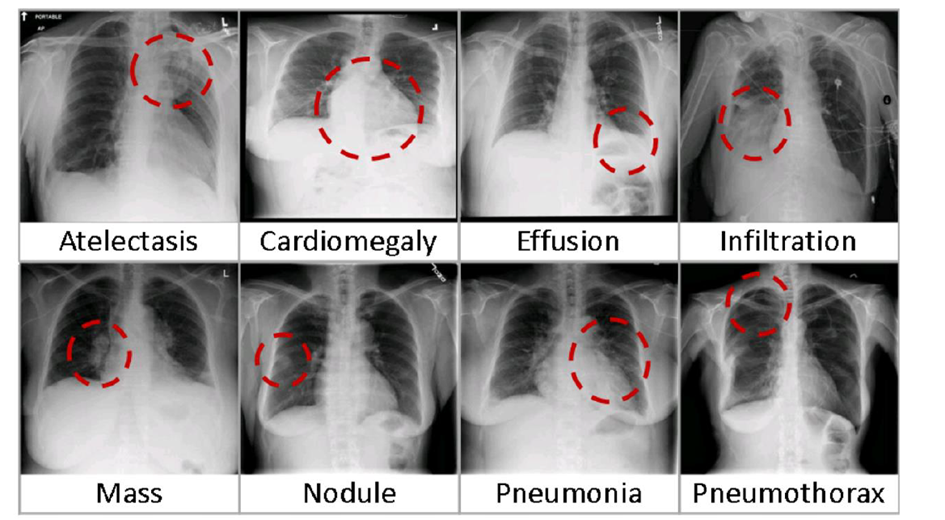

In [11]:
import os
import pathlib
import numpy as np
import pandas as pd
#import tensorflow as tf
import matplotlib.pyplot as plt
import random
import cv2
#import xgboost as xgb
import pathlib

In [12]:
# reading all data to dataframe df
df = pd.read_csv('Data_Entry_2017_v2020.csv')
df.head()

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_001.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           57              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           80              M            PA                 2500     2048   
4           74              F            PA                 2500     2048   

   OriginalImagePixelSpacing[x     y]  
0                        0.143  0.143  
1                        0.143  0.143  
2                        0.168  0.168  
3                        0.171  0.171  
4                        0.168  0.168

In [4]:
print('Data set involves variety of combinations of 8 main disease group (image below): ',len(df['Finding Labels'].unique()))
print('We are not going to use all combinations.')

Data set involves variety of combinations of 8 main disease group (image below):  836
We are not going to use all combinations.


### Reads excel sheet containing patient information such as Patient No., Diagnostic Finding (Finding Labels), image file name.

In [5]:
index = []
kcard, knofind, kpn, ke, kata, kin = 0, 0, 0, 0, 0, 0
for i in range(len(df['Finding Labels'])):
    if i == 0: 
        pass
    else:
        if df['Patient ID'][i] == df['Patient ID'][i-1]:
            pass
        elif df['Finding Labels'][i] == 'Cardiomegaly': 
            if kcard < 499:
                index.append(i)   
                kcard = 1 + kcard
                #print(kcard)
            else: 
                pass
        elif df['Finding Labels'][i] == 'No Finding':
            if knofind < 500:
                index.append(i)   
                knofind = 1 + knofind
                #print(knofind)
            else: 
                pass    
        elif df['Finding Labels'][i] == 'Atelectasis':
            if kata < 599:
                index.append(i)   
                kata = 1 + kata
                #print(knofind)
            else: 
                pass            
        elif df['Finding Labels'][i] == 'Infiltration':
            if kin < 500:
                index.append(i)   
                kin = 1 + kin
                #print(knofind)
            else: 
                pass 
        else: pass
len(index), df['Finding Labels'].shape

dl = []
for i in index:
    #print(df.values[i])
    dl.append(df.values[i])
dfp=pd.DataFrame(dl)
print('size of study group after first reduction:', dfp.shape)
dfp = dfp.rename(columns={0:'imageID', 1:'labels', 3:'patientID',
                         4:'Age', 5: 'gender'})
dfp.head()


size of study group after first reduction: (2059, 11)


imageID        labels  2  patientID  Age gender   6     7     8  \
0  00000002_000.png    No Finding  0          2   80      M  PA  2500  2048   
1  00000005_000.png    No Finding  0          5   69      F  PA  2048  2500   
2  00000006_000.png    No Finding  0          6   81      M  PA  2500  2048   
3  00000007_000.png    No Finding  0          7   82      M  PA  2500  2048   
4  00000008_000.png  Cardiomegaly  0          8   68      F  PA  2048  2500   

       9     10  
0  0.171  0.171  
1  0.168  0.168  
2  0.168  0.168  
3  0.168  0.168  
4  0.171  0.171

This is too much for our study and therefore only labels with selected diseases that are not combinations of variety of other diseases: 

Cardiomegaly, Pneumonia, Emphysema, No Finding


This shows how many patient images for analysis we have for the chosen labels (diseases): 


Cardiomegaly, Pneumonia, Emphysema, No Finding

In [6]:
dfp.groupby(['labels'])['labels'].count()

labels
Atelectasis     599
Cardiomegaly    460
Infiltration    500
No Finding      500
Name: labels, dtype: int64

## This part reads the extracted .png file names and saves the files to lists them as image_dataset.

This code tries to saves the files if it exists. Therefore, we have a little less imageset than, the dataframe itself holds. 

In [ ]:
import os

In [141]:

Image_ID_Index = dfp.imageID
def find_files(filename, search_path):
    result = []

# Walking top-down from the root
    for root, dir, files in os.walk(search_path):
        if filename in files:
            result.append(os.path.join(root, filename))
    return result

k = 0
images_dataset = [] # images_dataset = dfp.imageID
path = '/Users/ycd17/Desktop/MachineLearningNotebooks-master/lab2-ML/images'
ID_Index=[]
for i in range(len(Image_ID_Index)):
    try: 
        file=find_files(Image_ID_Index[i], path)
        if file != []:
            images_dataset.append(file)
            ID_Index.append(dfp.labels[i])
        else: 
            pass
    except IndexError: 
        pass
print('we have', len(images_dataset),'X-ray images')

we have 1446 X-ray images


In [142]:
Labels_from_Index=np.array(ID_Index)

In [143]:
Labels_from_Index

array(['No Finding', 'No Finding', 'No Finding', ..., 'Cardiomegaly',
       'Infiltration', 'Infiltration'], dtype='<U12')

In [144]:
np.unique(Labels_from_Index)

array(['Atelectasis', 'Cardiomegaly', 'Infiltration', 'No Finding'],
      dtype='<U12')

## Change the categoric labels with thee numeric ones

In [145]:
  for i in range(len(ID_Index)):
  
    if ID_Index[i] == 'No Finding':
        ID_Index[i] = 1

    if ID_Index[i] == 'Cardiomegaly':
        ID_Index[i] = 2
        
    if ID_Index[i] == 'Infiltration':
        ID_Index[i] = 3
        
    if ID_Index[i] == 'Atelectasis':
        ID_Index[i] = 4
  

In [146]:
np.unique(ID_Index)

array([1, 2, 3, 4])

In [147]:
Labels_from_Index=np.array(ID_Index)

In [148]:
count = np.count_nonzero(Labels_from_Index ==1)
count

500

## Reads images from images dataset, converts them to grayscale and reshapes them into 1-D np.array.

h, w parameters are how many pixels for height and width. 

Code first reads the images with opencv2 module, turns them into gray-scale and resizes them into h x w. 
X is image feature vectors, 2-D gray-scale image is turned into 1-D vector using reshape function.
X holds feature vectors of all images. 


In [170]:
import os
X = [] 
h, w = 256, 256 
for i in range(len(dfp.imageID)):  
    try:
        #image_data.append(cv2.imread(images_dataset[i][0]).reshape(-1))
        image = cv2.imread(images_dataset[i][0])
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # make grayscale
        gray_resized=cv2.resize(gray, (h,w))
        #print(gray_resized.shape)
        X.append(gray_resized.reshape(-1)) # converting gray image features in feature vector 
        
    except IndexError:
        pass

In [178]:
print("Len(x):", len(X))
print(X[0])
print('x0 shape', X[0].shape)

X2 = np.asarray(X) # Converts X to np.array
print("Xshape:", X2.shape)
print('There are ',X2.shape[0],'images. Each image has feature vector with size:', X2.shape[1])

Len(x): 1446
[114  88  77 ...  18  16  16]
x0 shape (65536,)
Xshape: (1446, 65536)
There are  1446 images. Each image has feature vector with size: 65536


In [180]:
np.ndarray.max(X2), np.ndarray.min(X2)

(255, 0)

In [176]:
X2= X2.astype(np.float32)

In [181]:
X22= X2.astype(np.float32)/255.0 - 0.5

In [182]:
X3 = X22.reshape((X22.shape[0],256,256,1)) # reshape as images

In [183]:
X3[0].shape

(256, 256, 1)

In [184]:
X3.shape

(1446, 256, 256, 1)

In [185]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

tf.random.set_seed(2)
np.random.seed(0) # using this to help make results reproducible

#digits = datasets.load_digits()
#print('shape', digits.data.shape)

#print('data itself:', digits.data)
#print(X)
# NORMALIZATION, SO IMPORTANT
#X = digits.data.astype(np.float32)/16.0 - 0.5
#print(X.shape)
#print('X:', X)
#print('X shape:', X.shape)

#y = digits.target.astype(np.int32)


#X = X.reshape((X.shape[0],8,8,1)) # reshape as images
#print('X after reshape:', X)
#print('X shape after reshape:', X.shape)
X=X3
y=Labels_from_Index

# Split it into train / test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Split X_train again to create validation data
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)
print('lenx:' , len(X))
print('x0 shape:', X[0].shape)
X_train.shape

lenx: 1446
x0 shape: (256, 256, 1)


(1156, 256, 256, 1)

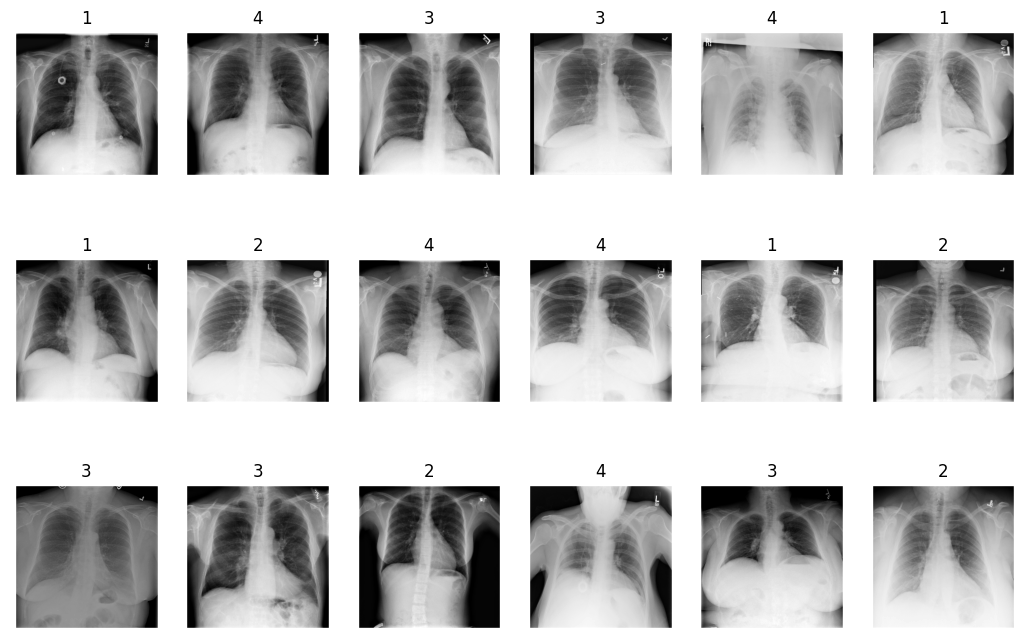

In [186]:
# What do these images look like?
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# a helper plotting function
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].squeeze(), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(X_train, y_train, 256, 256) # defaults to showing a 3 by 6 subset of the images

In [187]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

keras.__version__

'2.10.0'

In [188]:
NUM_CLASSES = 10
print(X_train.shape)
print(X_test.shape)

(1156, 256, 256, 1)
(290, 256, 256, 1)


In [189]:
%%time

# since this is not binary, we should go ahead and one-hot encode the inputs
y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)

# make a 3 layer keras MLP
mlp = Sequential()
mlp.add( Flatten() ) # make images flat for the MLP input
mlp.add( Dense(input_dim=1, units=30, 
               activation='relu') )
mlp.add( Dense(units=15, activation='relu') )
mlp.add( Dense(NUM_CLASSES) )
mlp.add( Activation('softmax') )

mlp.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

mlp.fit(X_train, y_train_ohe, 
        batch_size=32, epochs=150, 
        shuffle=True, verbose=0)

2022-12-03 18:21:06.039382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


CPU times: user 34.1 s, sys: 39.3 s, total: 1min 13s
Wall time: 1min 59s


In [190]:
%%time

# make a CNN with conv layer and max pooling
cnn = Sequential() 
cnn.add( Conv2D(filters=16, kernel_size= (2, 2), padding='same', 
                input_shape=(256,256,1),
               ) )

cnn.add( MaxPooling2D(pool_size=(2, 2)) )
cnn.add( Activation('relu') )
# add one layer on flattened output
cnn.add( Flatten() )
cnn.add( Dense(NUM_CLASSES) )
cnn.add( Activation('softmax') )

cnn.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 16)      80        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 activation_12 (Activation)  (None, 128, 128, 16)      0         
                                                                 
 flatten_8 (Flatten)         (None, 262144)            0         
                                                                 
 dense_16 (Dense)            (None, 10)                2621450   
                                                                 
 activation_13 (Activation)  (None, 10)                0         
                                                      

In [191]:
%%time 

print(X_train.shape)
# Let's train the model 
cnn.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

cnn.fit(X_train, y_train_ohe, 
        batch_size=32, epochs=150, 
        shuffle=True, verbose=0)

(1156, 256, 256, 1)


2022-12-03 18:23:14.251860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


CPU times: user 35.5 s, sys: 33.2 s, total: 1min 8s
Wall time: 3min 12s


In [192]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

def compare_mlp_cnn(cnn, mlp, X_test, y_test, labels='auto'):
    plt.figure(figsize=(15,5))
    if cnn is not None:
        yhat_cnn = np.argmax(cnn.predict(X_test), axis=1)
        acc_cnn = mt.accuracy_score(y_test,yhat_cnn)
        plt.subplot(1,2,1)
        cm = mt.confusion_matrix(y_test,yhat_cnn)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f',xticklabels=labels,yticklabels=labels)
        plt.title('CNN: '+str(acc_cnn))
    
    if mlp is not None:
        yhat_mlp = np.argmax(mlp.predict(X_test), axis=1)
        acc_mlp = mt.accuracy_score(y_test,yhat_mlp)
        plt.subplot(1,2,2)
        cm = mt.confusion_matrix(y_test,yhat_mlp)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm,annot=True, fmt='.2f',xticklabels=labels,yticklabels=labels)
        plt.title('MLP: '+str(acc_mlp))

10/10 [==============================] - 0s 9ms/step


2022-12-03 18:26:52.099657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-03 18:26:52.298162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 20ms/step


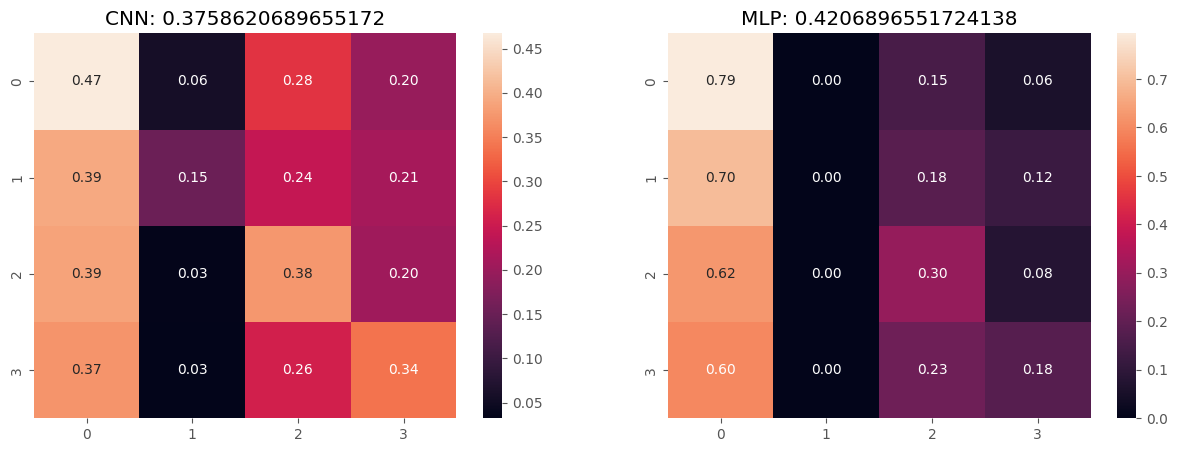

In [193]:
compare_mlp_cnn(cnn,mlp,X_test,y_test)

2022-12-03 18:28:08.645039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 10ms/step


2022-12-03 18:31:39.246098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 18ms/step
CPU times: user 35.6 s, sys: 35.1 s, total: 1min 10s
Wall time: 3min 31s


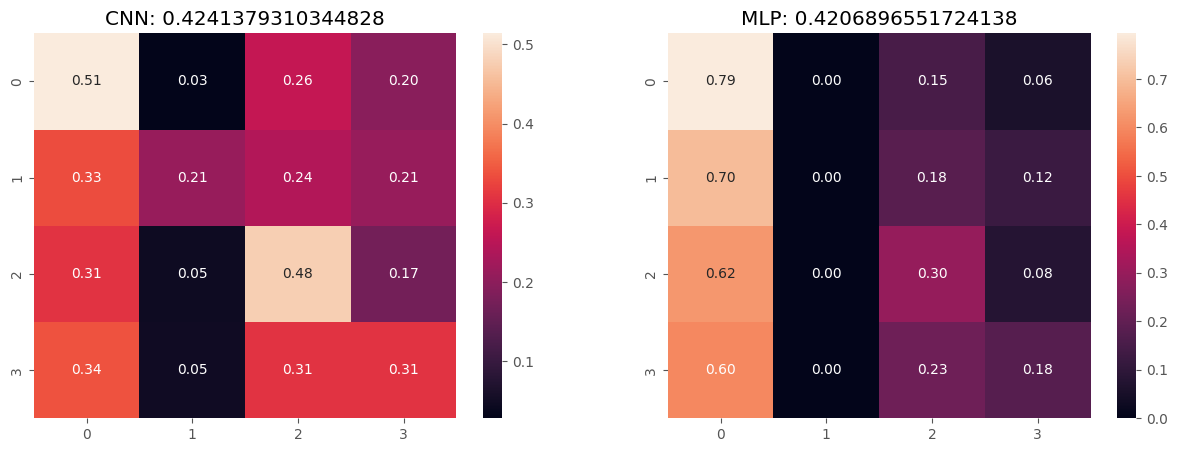

In [195]:
%%time

# changes: 
#    1. increased kernel size
cnn2 = Sequential()
cnn2.add( Conv2D(filters=16, kernel_size= (3, 3), 
                padding='same', input_shape=(256,256,1),
                ) )
cnn2.add( Activation('relu') )
cnn2.add( MaxPooling2D(pool_size=(2, 2)) )
# add one layer on flattened output
cnn2.add( Flatten() )
cnn2.add( Dense(NUM_CLASSES, activation='softmax') )

# Let's train the model 
cnn2.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

cnn2.fit(X_train, y_train_ohe, 
        batch_size=32, epochs=150, 
        shuffle=True, verbose=0)

compare_mlp_cnn(cnn2,mlp,X_test,y_test)

2022-12-03 18:32:56.011189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 9/10 [==========================>...] - ETA: 0s

2022-12-03 18:38:58.137953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 21ms/step
CPU times: user 41 s, sys: 44.3 s, total: 1min 25s
Wall time: 6min 3s


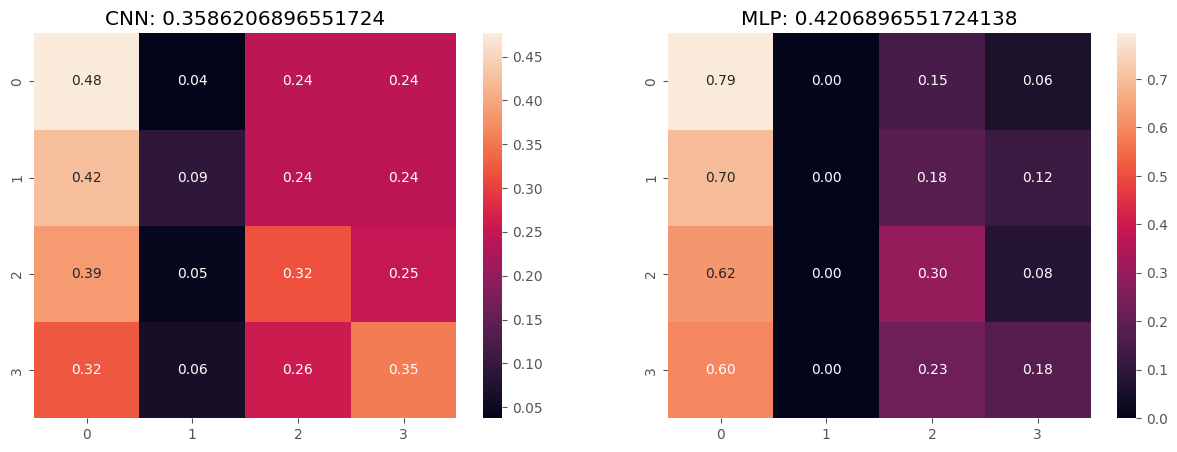

In [196]:
%%time

# changes: 
#    1. increased kernel size
#    2. add another conv/pool layer 
cnn3 = Sequential()

num_filt_layers = [32, 32]
for num_filters in num_filt_layers:
    cnn3.add( Conv2D(filters=num_filters, 
                    kernel_size=(3,3), 
                    padding='same',
                     ) )
    cnn3.add( Activation('relu'))
    cnn3.add( MaxPooling2D(pool_size=(2, 2)) )
    

# add one layer on flattened output
cnn3.add( Flatten() )
cnn3.add( Dense(NUM_CLASSES) )
cnn3.add( Activation('softmax') )

# Let's train the model 
cnn3.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

cnn3.fit(X_train, y_train_ohe, 
        batch_size=32, epochs=150, 
        shuffle=True, verbose=0)

compare_mlp_cnn(cnn3,mlp,X_test,y_test)

2022-12-03 18:42:02.270005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 4/10 [===========>..................] - ETA: 0s

2022-12-03 18:51:04.721741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 20ms/step
CPU times: user 57.5 s, sys: 1min 28s, total: 2min 25s
Wall time: 9min 4s


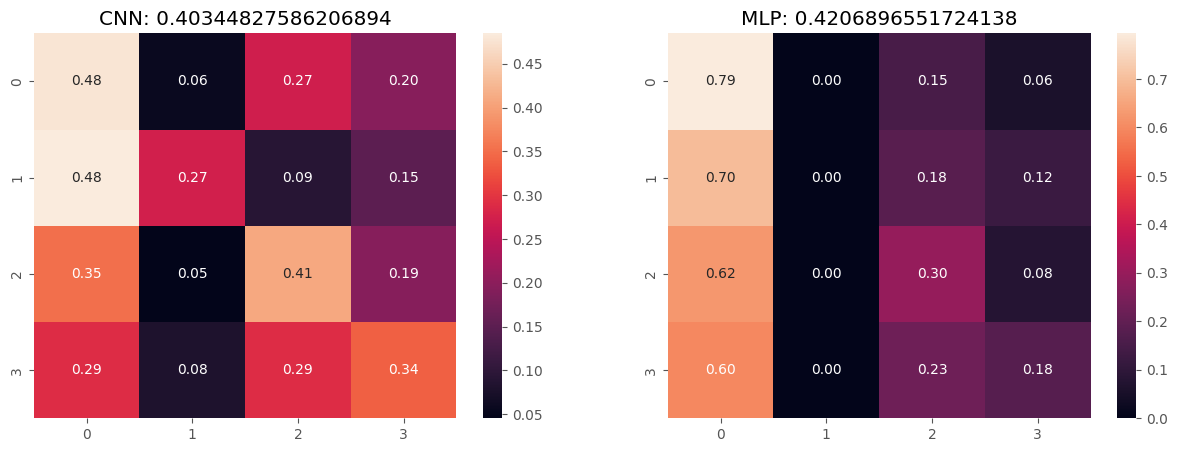

In [197]:
%%time

# changes: 
#    1. increased kernel size
#    2. add another conv/pool layer with increasing num filters
#    3. add more layers once flattened
cnn4 = Sequential()

num_filt_layers = [16, 32]
for num_filters in num_filt_layers:
    cnn4.add( Conv2D(filters=num_filters, 
                    kernel_size=(3,3), 
                    padding='same'))
    cnn4.add( Activation('relu'))
    cnn4.add( MaxPooling2D(pool_size=(2, 2)))
    

# add one layer on flattened output
cnn4.add( Flatten() )
cnn4.add( Dense(100) )
cnn4.add( Activation('relu') )
cnn4.add( Dense(NUM_CLASSES) )
cnn4.add( Activation('softmax') )

# Let's train the model 
cnn4.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

cnn4.fit(X_train, y_train_ohe, 
        batch_size=32, epochs=150, 
        shuffle=True, verbose=0)

compare_mlp_cnn(cnn4,mlp,X_test,y_test)

# Fashion MNIST
Okay, so we are honing in on the best performance for the digits data. But, we really need something a bit bigger to work on. Enter: Fashion MNIST. We have already used this dataset in the past, where we got about 84% accuracy with our custom MLP. Lets see how well Keras and tensorflow can perform!

Now let's load in a more diverse, harder to classify dataset: Fashion MNIST
https://www.kaggle.com/zalando-research/fashionmnist

**Labels**

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot 

In [200]:
# more data for handwriting recognition?
# Let's use Raschka's implementation for using the mnist dataset:
# https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
#import os
#import struct
#import numpy as np
# from sklearn.preprocessing import RobustScaler
 
#def load_mnist(path, kind='fashion_train'):
   # """Load MNIST data from `path`"""
   # labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
   # images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
        
   # with open(labels_path, 'rb') as lbpath:
  #      magic, n = struct.unpack('>II', lbpath.read(8))
 #       labels = np.fromfile(lbpath, dtype=np.uint8)
#
    #with open(images_path, 'rb') as imgpath:
   #     magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
  #      images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
 
 #   return images, labels

#X_train, y_train = load_mnist('data/', kind='fashion_train')
#X_test, y_test = load_mnist('data/', kind='fashion_t10k')

#X_train = X_train.reshape(X_train.shape[0],28,28,1)/255.0 - 0.5
#X_test = X_test.reshape(X_test.shape[0],28,28,1)/255.0 - 0.5

#print('X_train shape:', X_train.shape) 
#print('X_test shape:', X_test.shape)

NUM_CLASSES = 10


# make one- hot encoded versions of the data
y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [201]:
%%time

# make a keras MLP
mlp = Sequential()
mlp.add( Flatten() )
mlp.add( Dense(input_dim=1, units=100, activation='relu') )
mlp.add( Dense(units=50, activation='relu') )
mlp.add( Dense(units=50, activation='relu') )
mlp.add( Dense(NUM_CLASSES) )
mlp.add( Activation('softmax') )

mlp.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

mlp.fit(X_train, y_train_ohe, 
        batch_size=32, epochs=15, 
        shuffle=True, verbose=1)

Epoch 1/15


2022-12-03 18:58:58.887891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 2s 30ms/step - loss: 4.7769 - accuracy: 0.2630
Epoch 2/15
37/37 [==============================] - 1s 28ms/step - loss: 1.8940 - accuracy: 0.3469
Epoch 3/15
37/37 [==============================] - 1s 28ms/step - loss: 1.5568 - accuracy: 0.3529
Epoch 4/15
37/37 [==============================] - 1s 28ms/step - loss: 1.4906 - accuracy: 0.3555
Epoch 5/15
37/37 [==============================] - 1s 28ms/step - loss: 1.5061 - accuracy: 0.3806
Epoch 6/15
37/37 [==============================] - 1s 28ms/step - loss: 1.3635 - accuracy: 0.3798
Epoch 7/15
37/37 [==============================] - 1s 28ms/step - loss: 1.3535 - accuracy: 0.3694
Epoch 8/15
37/37 [==============================] - 1s 29ms/step - loss: 1.2594 - accuracy: 0.4239
Epoch 9/15
37/37 [==============================] - 1s 28ms/step - loss: 1.3027 - accuracy: 0.3988
Epoch 10/15
37/37 [==============================] - 1s 28ms/step - loss: 1.2224 - accuracy: 0.4524
Epoch 11/15
37/37 [=

 7/10 [====================>.........] - ETA: 0s

2022-12-03 18:59:53.852446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 21ms/step


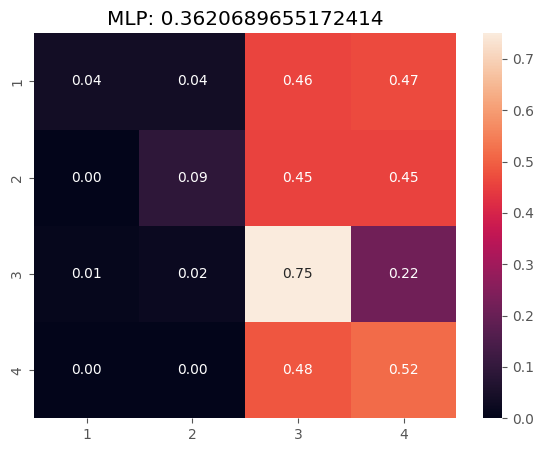

In [202]:
labels = [
    "1",
    "2",
    "3",
    "4"]
compare_mlp_cnn(None,mlp,X_test,y_test,labels)


Epoch 1/15


2022-12-03 19:00:16.698886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - ETA: 0s - loss: 0.0831 - accuracy: 0.3253

2022-12-03 19:00:21.926313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 6s 140ms/step - loss: 0.0831 - accuracy: 0.3253 - val_loss: 0.0754 - val_accuracy: 0.3690
Epoch 2/15
37/37 [==============================] - 5s 127ms/step - loss: 0.0714 - accuracy: 0.3997 - val_loss: 0.0719 - val_accuracy: 0.3483
Epoch 3/15
37/37 [==============================] - 5s 124ms/step - loss: 0.0687 - accuracy: 0.4230 - val_loss: 0.1027 - val_accuracy: 0.2276
Epoch 4/15
37/37 [==============================] - 5s 124ms/step - loss: 0.0633 - accuracy: 0.4862 - val_loss: 0.0691 - val_accuracy: 0.4241
Epoch 5/15
37/37 [==============================] - 5s 124ms/step - loss: 0.0547 - accuracy: 0.5952 - val_loss: 0.0743 - val_accuracy: 0.3345
Epoch 6/15
37/37 [==============================] - 5s 124ms/step - loss: 0.0415 - accuracy: 0.7137 - val_loss: 0.0761 - val_accuracy: 0.4034
Epoch 7/15
37/37 [==============================] - 5s 125ms/step - loss: 0.0302 - accuracy: 0.8183 - val_loss: 0.0818 - val_accuracy: 0.3759
Epoch 8/15
37/37 

2022-12-03 19:01:27.077765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 20ms/step
CPU times: user 8.31 s, sys: 10.1 s, total: 18.4 s
Wall time: 1min 11s


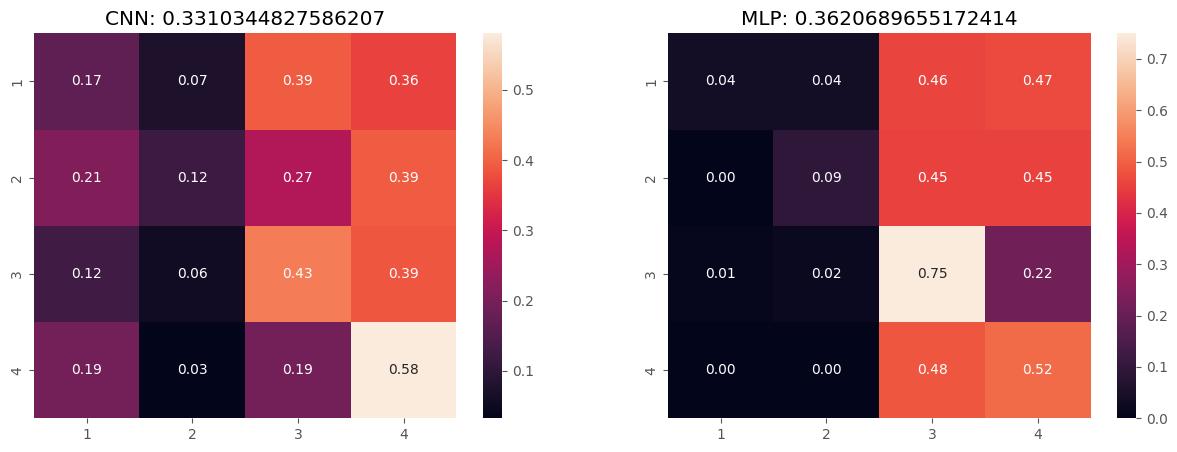

In [203]:
%%time

# changes: 
#    1. Baseline: 2 conv layers and two output layers
cnn1 = Sequential()

num_filt_layers = [24, 24]
for num_filters in num_filt_layers:
    cnn1.add( Conv2D(filters=num_filters, 
                    kernel_size=(3,3), 
                    padding='same') )
    cnn1.add( Activation('relu'))
    cnn1.add( MaxPooling2D(pool_size=(2, 2), 
                           ) )
    

# add one layer on flattened output
cnn1.add( Flatten() )
cnn1.add( Dense(100, activation='relu') )
cnn1.add( Dense(100, activation='relu') )
cnn1.add( Dense(NUM_CLASSES, activation='softmax') )

# Let's train the model 
cnn1.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

# we need to exapnd the dimensions here to give the 
#   "channels" dimension expected by Keras
cnn1.fit(X_train, y_train_ohe, 
        batch_size=32, epochs=15, 
        shuffle=True, verbose=1,
        validation_data=(X_test,y_test_ohe))

compare_mlp_cnn(cnn1,mlp,X_test,y_test,labels)

In [ ]:
%%time
# Copy TensorFlow Architecture from 
#   Deep MNIST for experts
#   https://www.tensorflow.org/versions/r0.11/tutorials/mnist/pros/index.html

# Manipulated to mirror parts of this network:
#   http://ankivil.com/mnist-database-and-simple-classification-networks/

cnn2 = Sequential()

num_filt_layers = [32, 64]
for num_filters in num_filt_layers:
    cnn2.add( Conv2D(filters=num_filters, 
                    kernel_size=(3,3), 
                    padding='same', 
                    activation='relu',
                    ) ) # more compact syntax

    # max pooling
    cnn2.add( MaxPooling2D(pool_size=(2, 2) ) )
    

# add one layer on flattened output
cnn2.add( Dropout(0.25) ) # add some dropout for regularization after conv layers
cnn2.add( Flatten() )
cnn2.add( Dense(1024, activation='relu') )
cnn2.add( Dropout(0.5) ) # add some dropout for regularization, again!
cnn2.add( Dense(NUM_CLASSES, activation='softmax') )

# Let's train the model 
cnn2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

# we need to exapnd the dimensions here to give the 
#   "channels" dimension expected by Keras
cnn2.fit(X_train, y_train_ohe, 
        batch_size=64, epochs=30, 
        shuffle=True, verbose=1,
        validation_data=(X_test,y_test_ohe))



Epoch 1/30


2022-12-03 19:01:39.844400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - ETA: 0s - loss: 6.9238 - accuracy: 0.2993

2022-12-03 19:02:03.314239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 26s 1s/step - loss: 6.9238 - accuracy: 0.2993 - val_loss: 1.3008 - val_accuracy: 0.3828
Epoch 2/30
19/19 [==============================] - 21s 1s/step - loss: 1.3274 - accuracy: 0.3754 - val_loss: 1.4621 - val_accuracy: 0.3069
Epoch 3/30
19/19 [==============================] - 20s 1s/step - loss: 1.2963 - accuracy: 0.3953 - val_loss: 1.5040 - val_accuracy: 0.2793
Epoch 4/30
19/19 [==============================] - 21s 1s/step - loss: 1.1721 - accuracy: 0.4827 - val_loss: 1.2845 - val_accuracy: 0.3966
Epoch 5/30
19/19 [==============================] - 20s 1s/step - loss: 1.0600 - accuracy: 0.5597 - val_loss: 1.4626 - val_accuracy: 0.3207
Epoch 6/30
19/19 [==============================] - 20s 1s/step - loss: 0.8273 - accuracy: 0.6843 - val_loss: 1.4822 - val_accuracy: 0.3483
Epoch 7/30
19/19 [==============================] - 20s 1s/step - loss: 0.7434 - accuracy: 0.7405 - val_loss: 1.5124 - val_accuracy: 0.3552
Epoch 8/30
19/19 [=============

12/12 [==============================] - 0s 3ms/step


2022-12-03 11:16:46.116628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 2ms/step


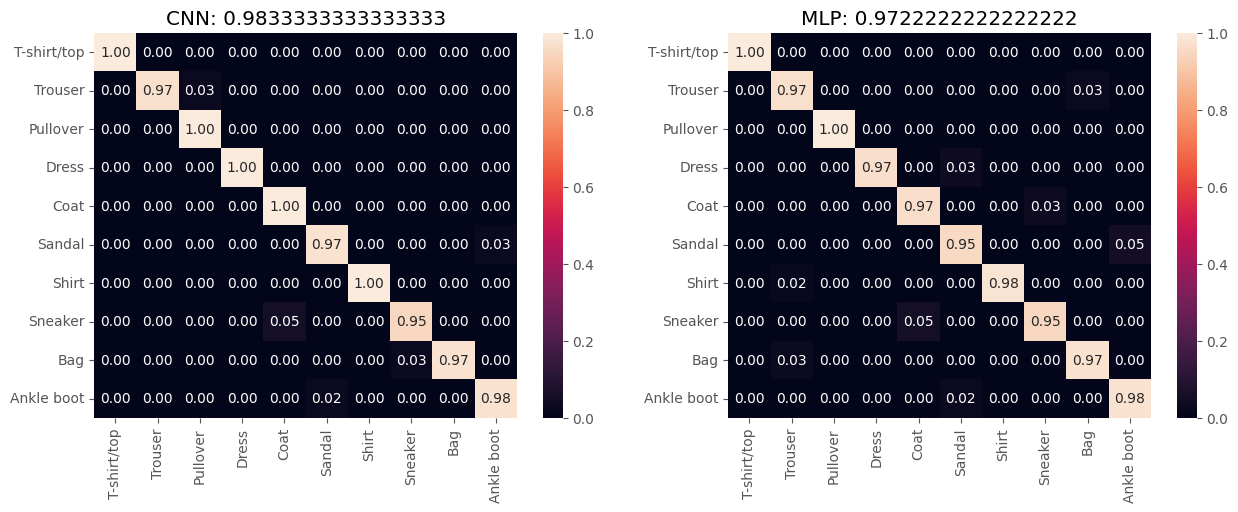

In [21]:
compare_mlp_cnn(cnn2,mlp,X_test,y_test,labels)

In [22]:
cnn2.evaluate(X_test,y_test_ohe,verbose=0)

[0.05633826553821564, 0.9833333492279053]

In [23]:
# want to save this model for later?
cnn2.save('large_data/mnist_cnn.h5')

12/12 [==============================] - 0s 3ms/step


2022-12-03 11:16:55.902827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


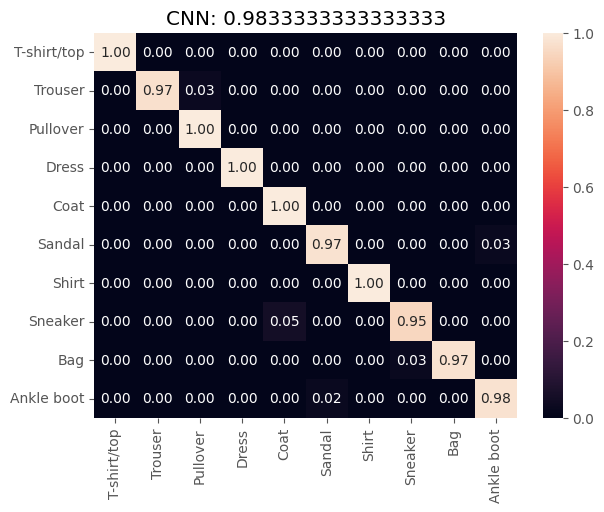

In [24]:
from tensorflow.keras.models import load_model

cnn_mnist = load_model('large_data/mnist_cnn.h5')
compare_mlp_cnn(cnn_mnist,None,X_test,y_test,labels)

First eigenfaces show the most common features. Because of that, they are mostly rounded shapes and they do not include detailed features. This can be seen from the graphs below. 

Plot below shows change of explained variance ratio with each addition of PCA component. In our study 200 components was chosen to make sure we are above %95 explained variance ratio. 

In [27]:
eigenfaces.shape

(200, 256, 256)

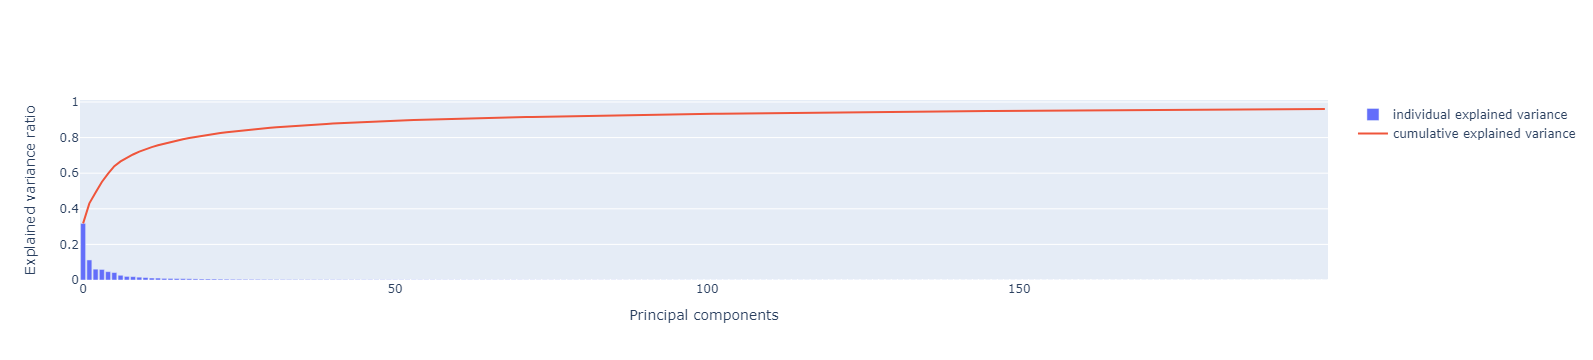

In [29]:
plot_explained_variance(pca)

First eigenfaces show the most common features. Because of that, they are mostly rounded shapes and they do not include detailed features. This can be seen from the graphs below.

As expected, with the increasing number of principal components, we get a better image construction. Since we use a medical image, it is important to show most features of the original data. Therefore, cut-off point should be high (>95%). 

For future analysis, number of eigenvectors will be selected as 200 (97%)

* We tried capture the computational cost difference between rPCA and PCA. However, we didn't observe any significant difference. It might be due to fact that the number images was not sufficient. This was done due to computational cost considerations. 

* We also didn't observe significant difference of explained variance ratio with increasing component number. The difference was in 0.0001 magnitudes.


Above images show that, with 200 elements both rPCA and PCA lacks the ability to capture image details as much as we anticipated, even though; the explained variance ratios were above %95. This might be due to the fact that image details are very important for this kind an analysis.

However, we couldn't increase the number of the principal components because of the computational cost. 